<a href="https://colab.research.google.com/github/rahatkader/Sign-Language-Digits-Prediction-with-MobileNet/blob/main/TensorFlow_Python_Deep_Learning_Neural_Network_API_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MobileNet image classification

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [3]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 0s 0us/step


In [6]:
def prepare_image(file):
    #img_path = 'data/MobileNet-samples/'
    #img = image.load_img(img_path + file, target_size=(224, 224))
    img = image.load_img(file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

## MobileNet prediction

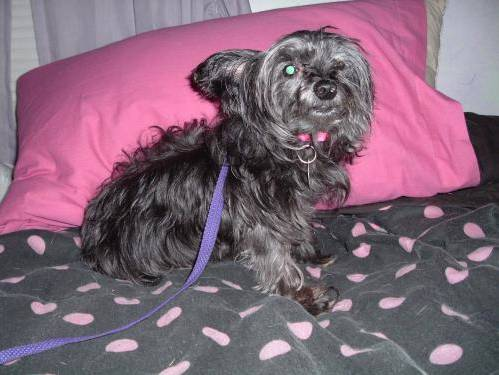

In [7]:
from IPython.display import Image
#Image(filename='data/MobileNet-samples/1.PNG', width=300,height=200) 
Image(filename='/content/drive/MyDrive/tutorial/Cats_and_dogs_dataset/train/dog/dog.0.jpg', width=300,height=200)

In [8]:
preprocessed_image = prepare_image('/content/drive/MyDrive/tutorial/Cats_and_dogs_dataset/train/dog/dog.0.jpg')
predictions = mobile.predict(preprocessed_image)

In [9]:
results = imagenet_utils.decode_predictions(predictions)

49152/35363 [=========================================] - 0s 0us/step


# MobileNet sign language classification

## Process the data

In [10]:
train_path = '/content/drive/MyDrive/tutorial/Sign Language Digits Dataset/train'
valid_path = '/content/drive/MyDrive/tutorial/Sign Language Digits Dataset/val'
test_path = '/content/drive/MyDrive/tutorial/Sign Language Digits Dataset/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 300 images belonging to 10 classes.
Found 100 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


## Loading model

In [11]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [12]:
x = mobile.layers[-5].output

In [13]:
x = tf.keras.layers.Reshape(target_shape=(1024,))(x)
output = Dense(units=10, activation='softmax')(x)

In [14]:
model = Model(inputs=mobile.input, outputs=output)

## Frezzing all hidden layers

In [15]:
for layer in model.layers[:-22]:
    layer.trainable = False

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

## Training

In [16]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=10,
            verbose=2
)

Epoch 1/10
30/30 - 98s - loss: 1.7534 - accuracy: 0.3967 - val_loss: 2.5594 - val_accuracy: 0.2500 - 98s/epoch - 3s/step
Epoch 2/10
30/30 - 2s - loss: 0.4195 - accuracy: 0.9633 - val_loss: 1.5631 - val_accuracy: 0.5000 - 2s/epoch - 54ms/step
Epoch 3/10
30/30 - 2s - loss: 0.2096 - accuracy: 0.9967 - val_loss: 1.0254 - val_accuracy: 0.6700 - 2s/epoch - 53ms/step
Epoch 4/10
30/30 - 2s - loss: 0.1078 - accuracy: 1.0000 - val_loss: 0.8455 - val_accuracy: 0.7400 - 2s/epoch - 53ms/step
Epoch 5/10
30/30 - 2s - loss: 0.0917 - accuracy: 1.0000 - val_loss: 0.6462 - val_accuracy: 0.8300 - 2s/epoch - 52ms/step
Epoch 6/10
30/30 - 2s - loss: 0.0507 - accuracy: 1.0000 - val_loss: 0.4804 - val_accuracy: 0.8600 - 2s/epoch - 52ms/step
Epoch 7/10
30/30 - 2s - loss: 0.0464 - accuracy: 1.0000 - val_loss: 0.4319 - val_accuracy: 0.8600 - 2s/epoch - 52ms/step
Epoch 8/10
30/30 - 2s - loss: 0.0386 - accuracy: 1.0000 - val_loss: 0.3719 - val_accuracy: 0.8900 - 2s/epoch - 51ms/step
Epoch 9/10
30/30 - 2s - loss: 0.

In [18]:
test_labels = test_batches.classes

## Prediction

In [19]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=2)

20/20 - 48s - 48s/epoch - 2s/step


## Confusion matrix

In [20]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[20  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0  1 19  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  1  1  0]
 [ 0  0  0  0  1 19  0  0  0  0]
 [ 0  0  2  0  2  0 15  1  0  0]
 [ 0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0  0  2 18  0]
 [ 0  0  0  0  0  0  0  0  0 20]]


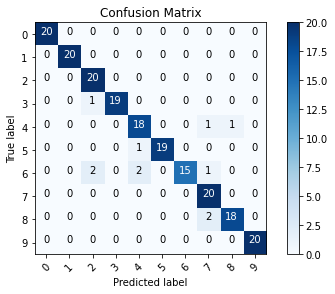

In [23]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [27]:
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(test_labels, predictions.argmax(axis=1)))

Accuracy:  0.945
